# Explores data from Mon ResoVelo app  to corroborate assumptions in the analysis of Bixi

In [1]:
import json
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read json
with open('../data/mrv/trip5000.json') as j:
    j_mrv = json.load(j)
type( j_mrv)

dict

In [3]:
df_mrv = json_normalize(data = j_mrv['features']) # 'features' is the key to acces information about trips
df_mrv.head()

,type,geometry.type,geometry.coordinates,properties.stop,properties.id_origine,properties.start,properties.length,properties.purpose,properties.liste_segments_jsonb,properties.n_coord,properties.id
0,Feature,LineString,"[[-73.577476909289, 45.5069002299392], [-73.57...",2013-06-25 16:34:16,52,2013-06-25 16:21:21,3163,Commute,"[{'source': 'GEOBASE', 'id': 1260962}, {'sourc...",511,52
1,Feature,LineString,"[[-73.6289698270757, 45.4637247074939], [-73.6...",2013-07-25 14:40:06,2325,2013-07-25 14:37:42,1066,Courses,"[{'source': 'GEOBASE', 'id': 1310311}, {'sourc...",196,2325
2,Feature,LineString,"[[-73.5848059077338, 45.5678560254651], [-73.5...",2013-07-25 14:43:12,2326,2013-07-25 14:19:15,5619,Courses,"[{'source': 'GEOBASE', 'id': 1170061}, {'sourc...",1036,2326
3,Feature,LineString,"[[-73.577476909289, 45.5069002299392], [-73.57...",2013-06-25 16:34:16,53,2013-06-25 16:21:20,3115,Commute,"[{'source': 'GEOBASE', 'id': 1260962}, {'sourc...",1403,53
4,Feature,LineString,"[[-73.6050191016393, 45.5190269268572], [-73.6...",2013-06-26 13:00:05,56,2013-06-26 12:46:01,5376,Domicile-travail,"[{'source': 'RES_CYCL_2015', 'id': 4263}, {'so...",1004,56


In [4]:
df_mrv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4881 entries, 0 to 4880
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   type                             4881 non-null   object
 1   geometry.type                    4881 non-null   object
 2   geometry.coordinates             4881 non-null   object
 3   properties.stop                  4880 non-null   object
 4   properties.id_origine            4881 non-null   int64 
 5   properties.start                 4880 non-null   object
 6   properties.length                4881 non-null   int64 
 7   properties.purpose               4881 non-null   object
 8   properties.liste_segments_jsonb  4881 non-null   object
 9   properties.n_coord               4881 non-null   int64 
 10  properties.id                    4881 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 419.6+ KB


In [5]:
df_mrv.shape

(4881, 11)

In [6]:
df_mrv.isnull().sum()

type                               0
geometry.type                      0
geometry.coordinates               0
properties.stop                    1
properties.id_origine              0
properties.start                   1
properties.length                  0
properties.purpose                 0
properties.liste_segments_jsonb    0
properties.n_coord                 0
properties.id                      0
dtype: int64

In [7]:
df_mrv.columns.to_list()

['type',
 'geometry.type',
 'geometry.coordinates',
 'properties.stop',
 'properties.id_origine',
 'properties.start',
 'properties.length',
 'properties.purpose',
 'properties.liste_segments_jsonb',
 'properties.n_coord',
 'properties.id']

In [8]:
dif = df_mrv['properties.id_origine'] -  df_mrv['properties.id'] #chek if column 'properties.id_origine' is equal to 'properties.id'
dif.sum()

0

In [9]:
#get and organze columns to a new data frame 
df_mrv_c = df_mrv[['properties.id' , 'properties.start' , 'properties.stop' , 'properties.length' , 'properties.purpose' , 'geometry.coordinates']]

#convert type to dates
df_mrv_c['properties.stop'] = pd.to_datetime(df_mrv_c['properties.stop'])
df_mrv_c['properties.start'] = pd.to_datetime(df_mrv_c['properties.start'])

df_mrv_c = df_mrv_c.sort_values(by = 'properties.start' , ascending=True , ignore_index=True)
df_mrv_c = df_mrv_c.dropna()
df_mrv_c.head()

,properties.id,properties.start,properties.stop,properties.length,properties.purpose,geometry.coordinates
0,53,2013-06-25 16:21:20,2013-06-25 16:34:16,3115,Commute,"[[-73.577476909289, 45.5069002299392], [-73.57..."
1,52,2013-06-25 16:21:21,2013-06-25 16:34:16,3163,Commute,"[[-73.577476909289, 45.5069002299392], [-73.57..."
2,56,2013-06-26 12:46:01,2013-06-26 13:00:05,5376,Domicile-travail,"[[-73.6050191016393, 45.5190269268572], [-73.6..."
3,140,2013-06-26 16:22:49,2013-06-26 16:47:34,6693,other,"[[-73.5552691229741, 45.4983082128662], [-73.5..."
4,114,2013-06-29 12:44:04,2013-06-29 12:52:21,1448,Autre,"[[-73.563140793721, 45.5162617831643], [-73.56..."


In [10]:
df_mrv_c = df_mrv_c.rename(columns={"properties.id":"id" , "properties.start":"start" , "properties.stop":"stop" , 'properties.length':'lenghth' , 'properties.purpose':'purpose' , 'geometry.coordinates' : 'coordinates'})
len(df_mrv_c)

4880

In [11]:
#breaking the coordinates into two columns
lst_longitude_start = []
lst_longitude_end = []
lst_latitude_start = []
lst_latitude_end = []

for i in range(0,len(df_mrv_c)):
    lst_longitude_start.append(df_mrv_c['coordinates'][i][0][0])
    lst_longitude_end.append(df_mrv_c['coordinates'][i][-1][0])
    lst_latitude_start.append(df_mrv_c['coordinates'][i][0][-1])
    lst_latitude_end.append(df_mrv_c['coordinates'][i][-1][-1])

df_mrv_c['longitude_start'] = lst_longitude_start
df_mrv_c['latitude_start'] = lst_latitude_start
df_mrv_c['longitude_end'] = lst_longitude_end
df_mrv_c['latitude_end'] = lst_latitude_end

df_mrv_c.head()

,id,start,stop,lenghth,purpose,coordinates,longitude_start,latitude_start,longitude_end,latitude_end
0,53,2013-06-25 16:21:20,2013-06-25 16:34:16,3115,Commute,"[[-73.577476909289, 45.5069002299392], [-73.57...",-73.577477,45.506900,-73.604450,45.519657
1,52,2013-06-25 16:21:21,2013-06-25 16:34:16,3163,Commute,"[[-73.577476909289, 45.5069002299392], [-73.57...",-73.577477,45.506900,-73.604450,45.519657
2,56,2013-06-26 12:46:01,2013-06-26 13:00:05,5376,Domicile-travail,"[[-73.6050191016393, 45.5190269268572], [-73.6...",-73.605019,45.519027,-73.555549,45.496965
3,140,2013-06-26 16:22:49,2013-06-26 16:47:34,6693,other,"[[-73.5552691229741, 45.4983082128662], [-73.5...",-73.555269,45.498308,-73.619801,45.514986
4,114,2013-06-29 12:44:04,2013-06-29 12:52:21,1448,Autre,"[[-73.563140793721, 45.5162617831643], [-73.56...",-73.563141,45.516262,-73.551402,45.509882


In [12]:
df_mrvelo = df_mrv_c.drop(columns='coordinates')
df_mrvelo

,id,start,stop,lenghth,purpose,longitude_start,latitude_start,longitude_end,latitude_end
0,53,2013-06-25 16:21:20,2013-06-25 16:34:16,3115,Commute,-73.577477,45.506900,-73.604450,45.519657
1,52,2013-06-25 16:21:21,2013-06-25 16:34:16,3163,Commute,-73.577477,45.506900,-73.604450,45.519657
2,56,2013-06-26 12:46:01,2013-06-26 13:00:05,5376,Domicile-travail,-73.605019,45.519027,-73.555549,45.496965
3,140,2013-06-26 16:22:49,2013-06-26 16:47:34,6693,other,-73.555269,45.498308,-73.619801,45.514986
4,114,2013-06-29 12:44:04,2013-06-29 12:52:21,1448,Autre,-73.563141,45.516262,-73.551402,45.509882
...,...,...,...,...,...,...,...,...,...
4875,28885,2015-08-30 13:05:28,2015-08-30 13:11:04,1392,Magasinage,-73.595296,45.566031,-73.590864,45.567086
4876,28893,2015-08-30 15:40:30,2015-08-30 16:16:31,1853,Magasinage,-73.581507,45.525553,-73.571655,45.520228
4877,28904,2015-08-30 19:35:18,2015-08-30 19:52:47,1521,Magasinage,-73.571318,45.520606,-73.571655,45.520228
4878,28942,2015-08-31 14:29:50,2015-08-31 14:36:53,1102,Aller au travail,-73.572595,45.519246,-73.580573,45.522895


In [13]:
df_mrvelo['purpose'].unique().tolist()

['Commute',
 'Domicile-travail',
 'other',
 'Autre',
 'Errand',
 'Social',
 'Work-related',
 'Shopping',
 'School',
 'Magasinage',
 'Sport',
 'Exercise',
 'Other',
 'École',
 'Travail',
 'Courses',
 'Autres',
 'Work-Related',
 'Aller au travail',
 'Déplacement professionnel',
 'Autres motifs',
 'Leisure',
 'Loisirs']

In [14]:
#change name is french, and group some categories and typos 
df_mrvelo = df_mrvelo.replace({'purpose' : { 'Domicile-travail' : 'Work', 
                                'Commute' : 'Work',
                                'Travail' : 'Work',
                                'Courses' : 'Groceries',
                                'Magasinage' : 'Groceries',
                                'Work-related' : 'Work',
                                'Autres' : 'Other',
                                'other' : 'Other',
                                'Autre' : 'Other',
                                'Aller au travail' : 'Work',
                                'Déplacement professionnel' : 'Work',
                                'École'  : 'School',
                                'Loisirs' : 'Leisure',
                                'Autres motif' : 'Other',
                                'Work-Related' : 'Work',
                                'Exercise' : 'Sport'
                                }})

In [15]:
purpose = df_mrvelo['purpose'].value_counts()
purpose

Work             2343
Social            751
Groceries         581
Other             419
Sport             411
Errand            126
Shopping           88
School             82
Leisure            69
Autres motifs      10
Name: purpose, dtype: int64

Text(0.5, 1.0, 'purpose of the trip')

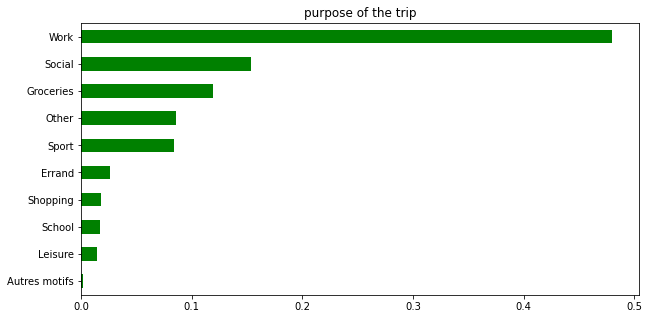

In [20]:
purpose = purpose.sort_values()
plt.figure(figsize=(10,5))
(purpose/purpose.sum()).plot(kind='barh' , color="green")
plt.title('purpose of the trip')